In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,r2_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras


In [ ]:
dataset= pd.read_csv('Food_Delivery_Times_Classification.csv')

In [ ]:
dataset.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Speed
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,Average
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,Slow
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,Average
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,Fast
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,Average


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.shape

(1000, 9)

In [ ]:
dataset.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Speed,0


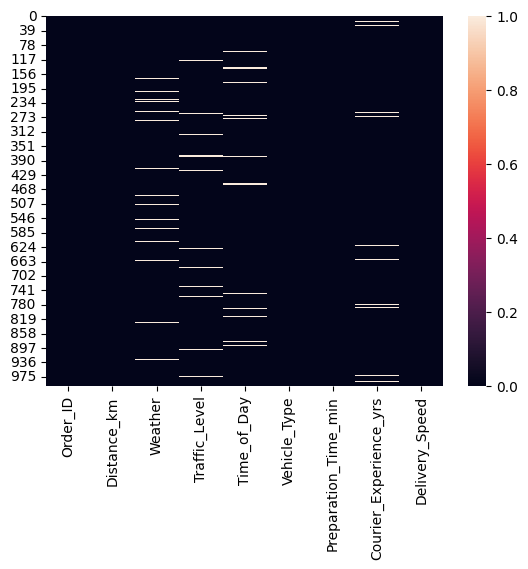

In [ ]:
sns.heatmap(dataset.isnull())
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Speed          1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


In [ ]:
dataset.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs
count,1000.000000,1000.000000,1000.000000,970.000000
mean,500.500000,10.059970,16.982000,4.579381
std,288.819436,5.696656,7.204553,2.914394
min,1.000000,0.590000,5.000000,0.000000
25%,250.750000,5.105000,11.000000,2.000000
50%,500.500000,10.190000,17.000000,5.000000
75%,750.250000,15.017500,23.000000,7.000000
max,1000.000000,19.990000,29.000000,9.000000


In [ ]:
# Duplicates
print(f'Number of duplicates in this dataset: {dataset.duplicated().sum()}')

Number of duplicates in this dataset: 0


# Handle Missing Values

In [ ]:
dataset['Weather'] = dataset['Weather'].fillna(dataset['Weather'].mode()[0])

dataset['Traffic_Level'] = dataset['Traffic_Level'].fillna(dataset['Traffic_Level'].mode()[0])

dataset['Time_of_Day'] = dataset['Time_of_Day'].fillna(dataset['Time_of_Day'].mode()[0])

dataset['Courier_Experience_yrs'] = dataset['Courier_Experience_yrs'].fillna(dataset['Courier_Experience_yrs'].median())

In [ ]:
dataset.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Speed,0


In [ ]:
dataset.head(20)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Speed
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,Average
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,Slow
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,Average
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,Fast
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,Average
5,679,19.40,Clear,Low,Evening,Scooter,8,9.0,Average
6,627,9.52,Clear,Low,Morning,Bike,12,1.0,Average
7,514,17.39,Clear,Medium,Evening,Scooter,5,6.0,Average
8,860,1.78,Snowy,Low,Evening,Car,20,6.0,Fast
9,137,10.62,Foggy,Low,Evening,Scooter,29,1.0,Slow


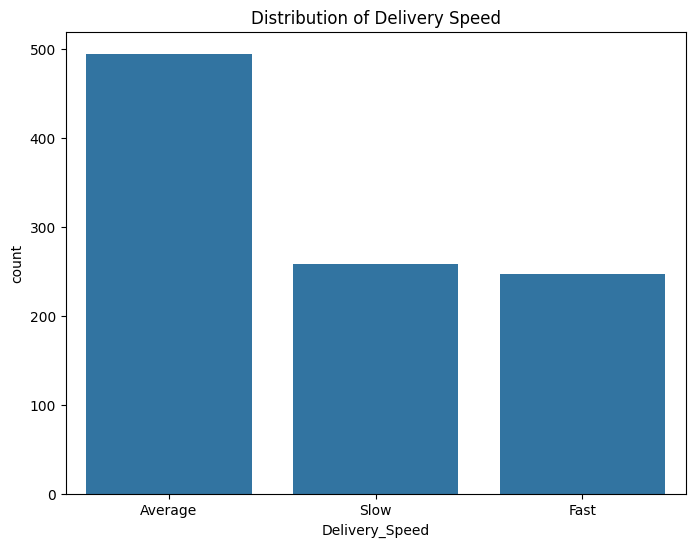

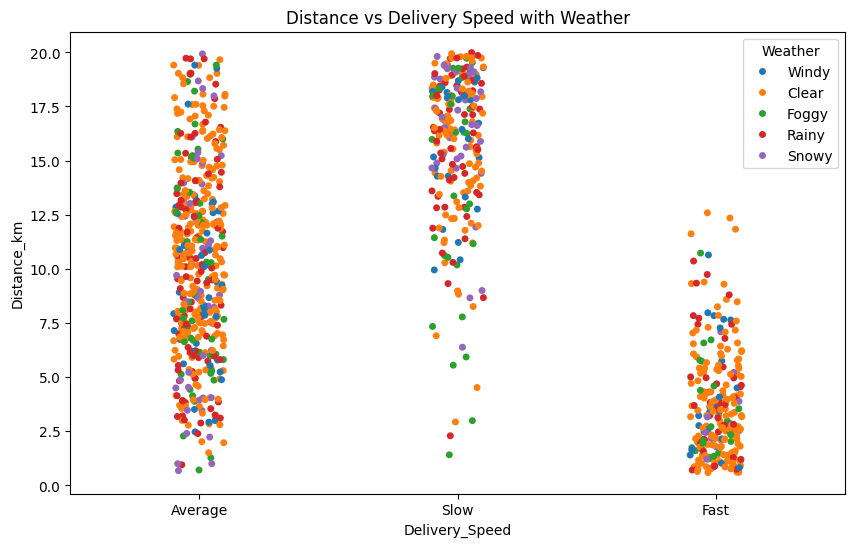

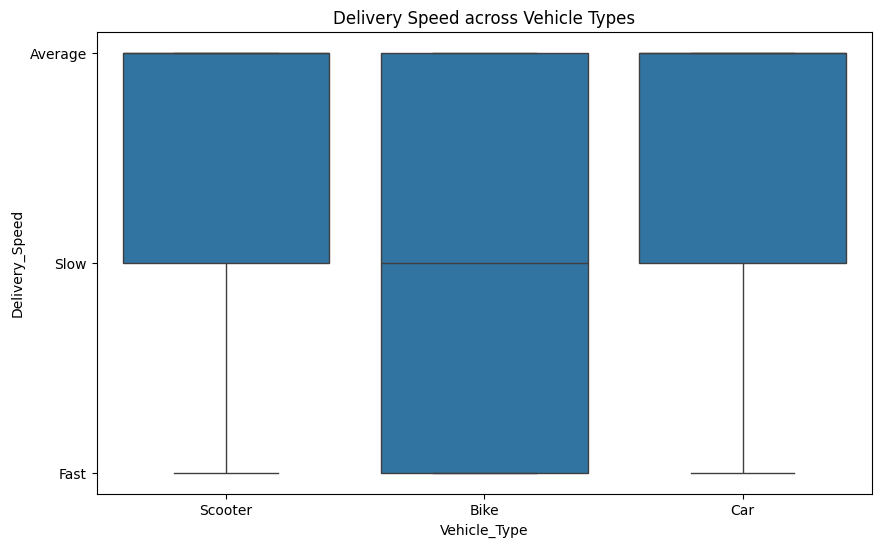

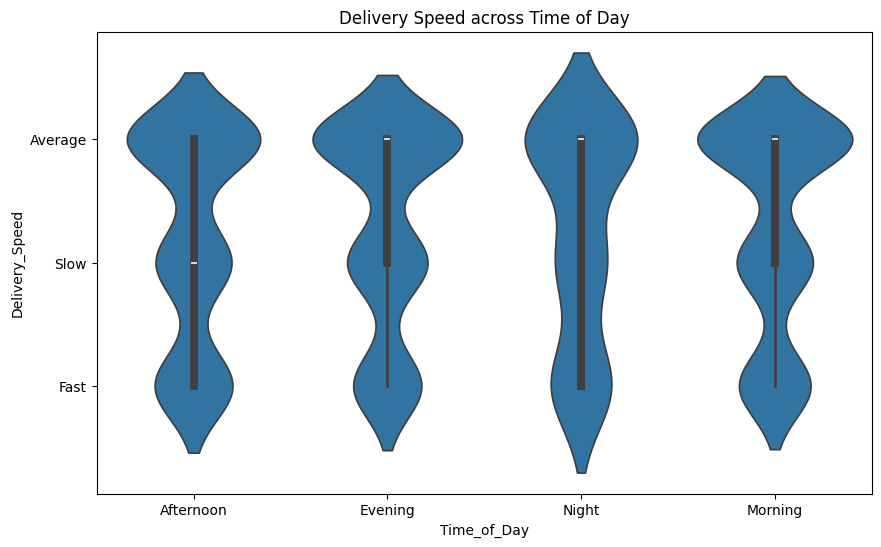

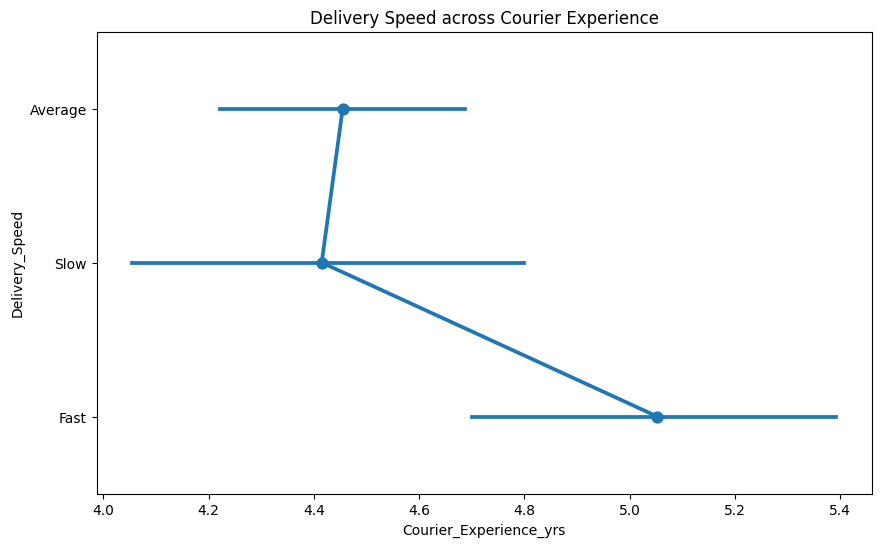

In [ ]:
cols_to_plot = ["Distance_km", "Weather", "Traffic_Level", "Time_of_Day",
                "Vehicle_Type", "Preparation_Time_min", "Courier_Experience_yrs", "Delivery_Speed"]

# Bar plot (example: Delivery Speed distribution)
plt.figure(figsize=(8, 6))
sns.countplot(x='Delivery_Speed', data=dataset)
plt.title('Distribution of Delivery Speed')
plt.show()

# Stripplot (example: Distance vs Delivery Speed)
plt.figure(figsize=(10, 6))
sns.stripplot(x='Delivery_Speed', y='Distance_km', data=dataset, jitter=True, hue='Weather')
plt.title('Distance vs Delivery Speed with Weather')
plt.show()

# Boxplot (example: Delivery Speed across Vehicle Types)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Delivery_Speed', data=dataset)
plt.title('Delivery Speed across Vehicle Types')
plt.show()


# Violin Plot (example: Delivery Speed across Time of Day)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Time_of_Day', y='Delivery_Speed', data=dataset)
plt.title('Delivery Speed across Time of Day')
plt.show()

#  (example: Delivery Speed across Courier Experience)
plt.figure(figsize=(10,6))
sns.pointplot(x='Courier_Experience_yrs', y='Delivery_Speed', data=dataset)
plt.title('Delivery Speed across Courier Experience')
plt.show()


# Encoding

In [ ]:
numerical_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


In [ ]:
le = LabelEncoder()
dataset['Weather'] = le.fit_transform(dataset['Weather'])
dataset['Traffic_Level'] = le.fit_transform(dataset['Traffic_Level'])
dataset['Time_of_Day'] = le.fit_transform(dataset['Time_of_Day'])
dataset['Vehicle_Type']= le.fit_transform(dataset['Vehicle_Type'])
dataset['Delivery_Speed'] = le.fit_transform(dataset['Delivery_Speed'])
dataset.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Speed
0,522,7.93,4,1,0,2,12,1.0,0
1,738,16.42,0,2,1,0,20,2.0,2
2,741,9.52,1,1,3,2,28,1.0,0
3,661,7.44,2,2,0,2,5,1.0,1
4,412,19.03,0,1,2,0,16,5.0,0


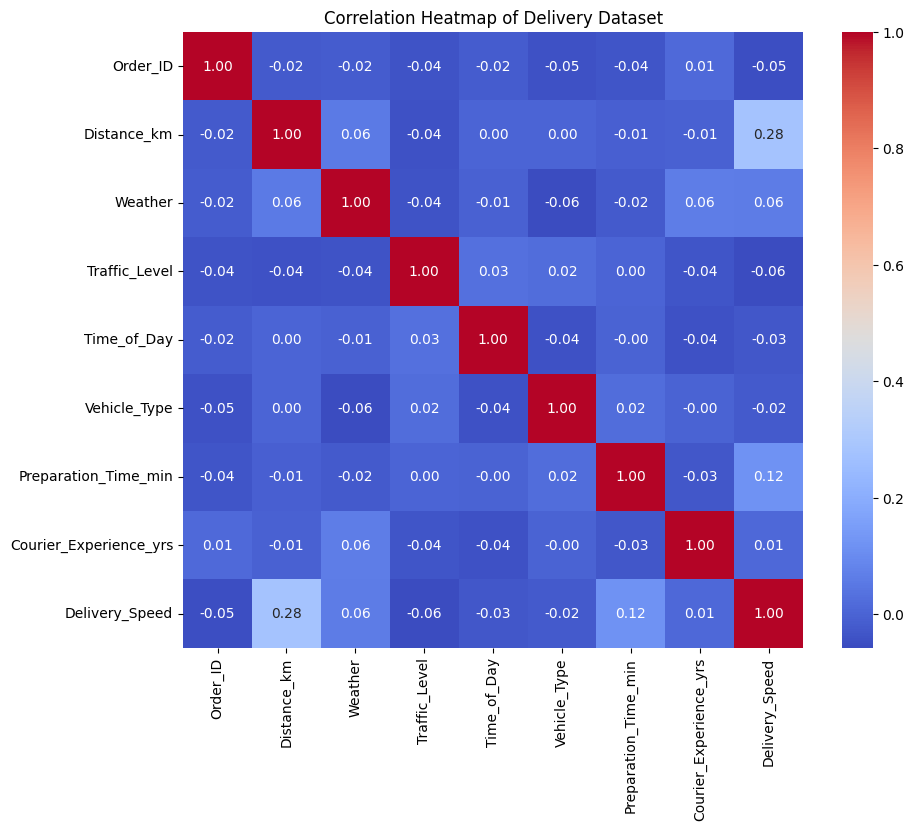

In [ ]:
# Create the heatmap
numeric_data = dataset.select_dtypes(include='number')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Delivery Dataset')
plt.show()

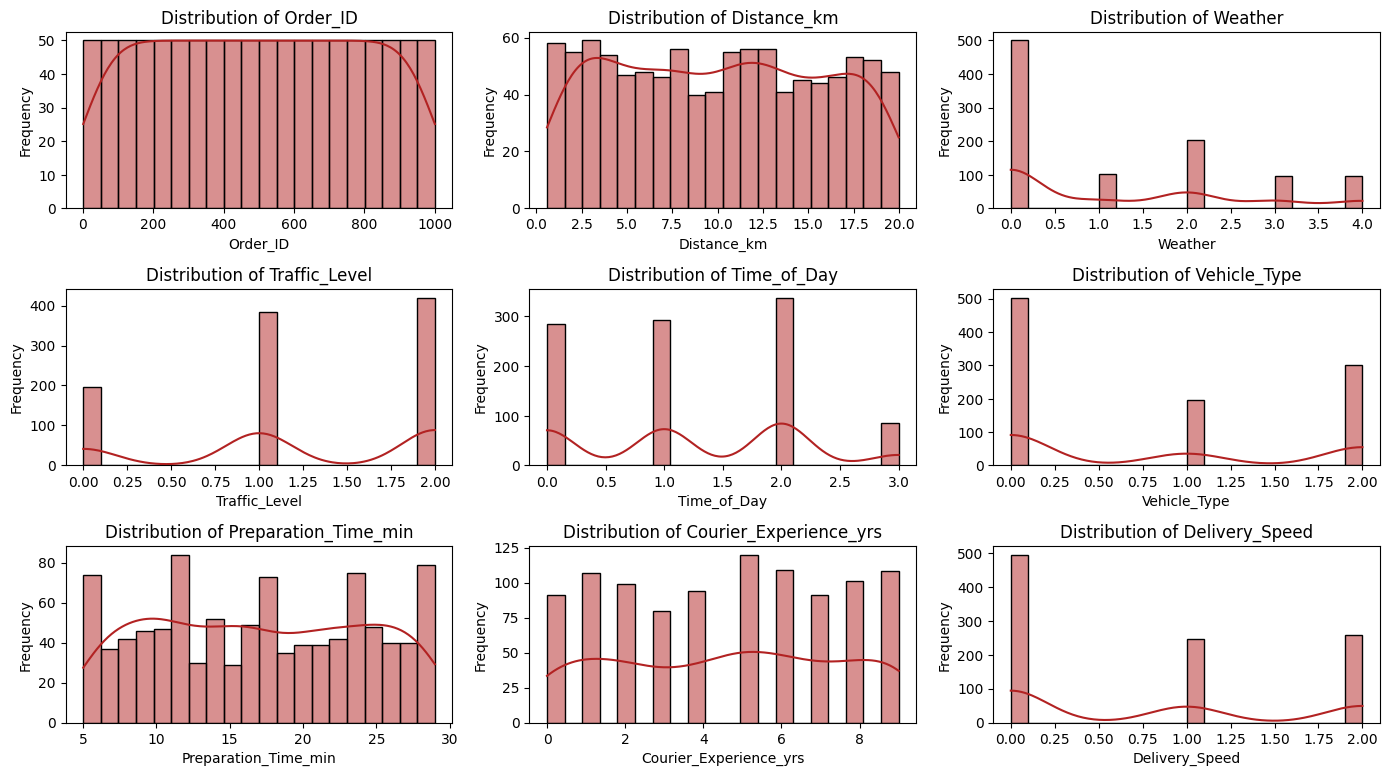

In [ ]:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(dataset[col], kde=True, bins=20, color='firebrick')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
X = dataset.drop('Delivery_Speed', axis=1)
y = dataset['Delivery_Speed']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% train, 30% test


In [ ]:
# Calculate Q1, Q3, and IQR for each numeric column
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = dataset[col].quantile(0.25) #
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    dataset = dataset[~((dataset[col] < lower_bound) | (dataset[col] > upper_bound))]



In [ ]:
# Feature Scaling (already done, but showing it again after removing ouliers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Pipelines for both models
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train models
rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)

# Predict
rf_preds = rf_pipeline.predict(X_test)
lr_preds = lr_pipeline.predict(X_test)

# Accuracy scores
rf_acc = accuracy_score(y_test, rf_preds)
lr_acc = accuracy_score(y_test, lr_preds)

# Print accuracy
print("Random Forest Accuracy: {:.2f}%".format(rf_acc * 100))
print("Logistic Regression Accuracy: {:.2f}%".format(lr_acc * 100))

Random Forest Accuracy: 78.67%
Logistic Regression Accuracy: 82.67%


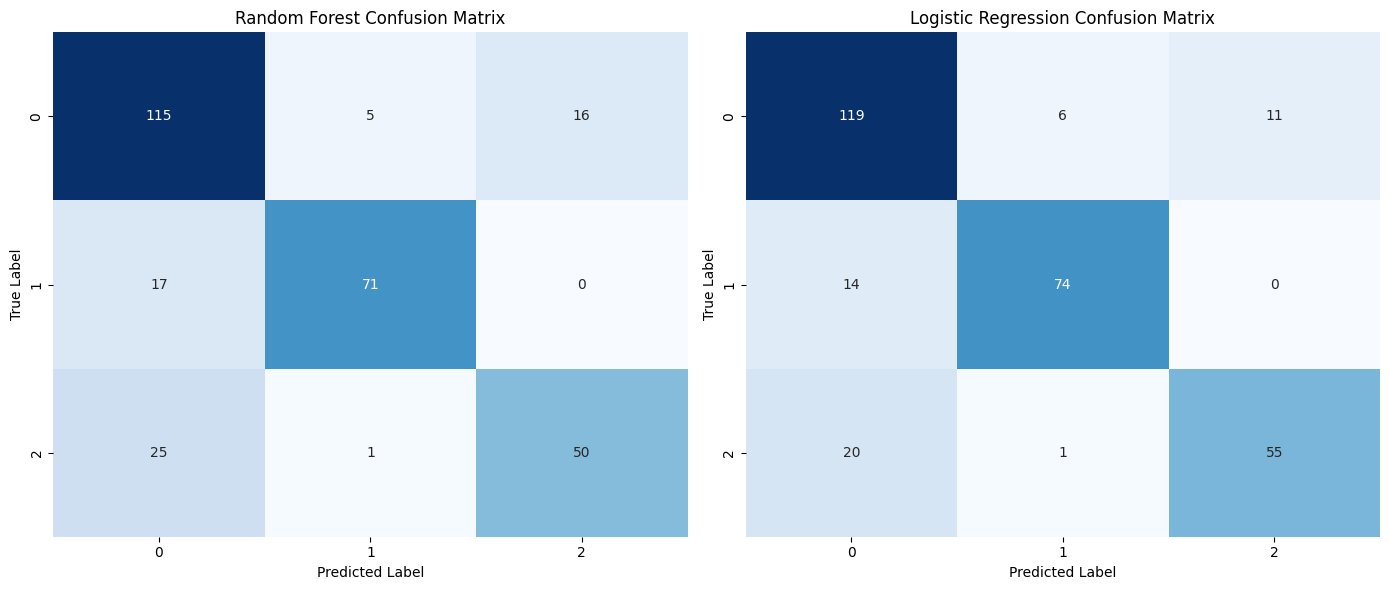

In [ ]:
#confusion matrix
plt.figure(figsize=(14, 6))
#confution for random_for
plt.subplot(1, 2, 1)
rf_cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
#logistic
plt.subplot(1, 2, 2)
lr_cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')



plt.tight_layout()
plt.show()

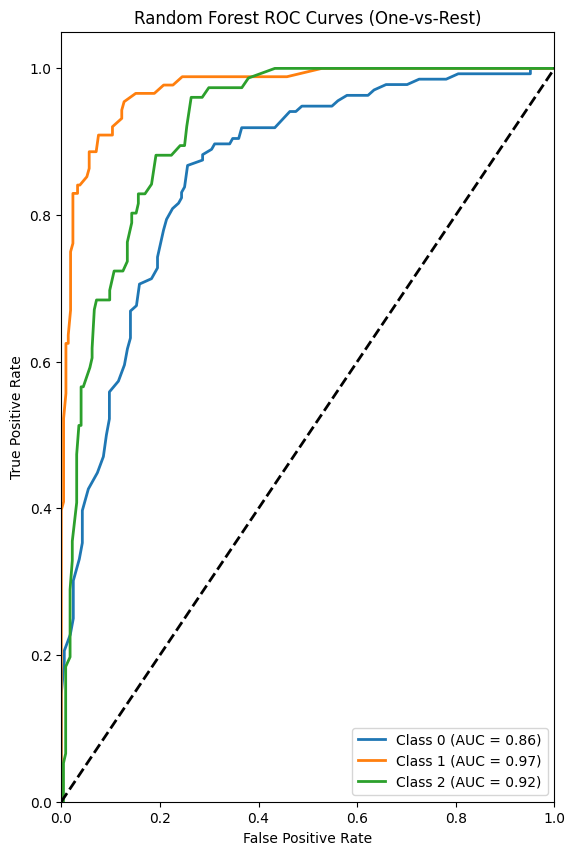

In [ ]:
#ROC
#RANDOM FOREST
n_classes = len(np.unique(y))
rf_prob = rf_pipeline.predict_proba(X_test)
lr_prob = lr_pipeline.predict_proba(X_test)

plt.figure(figsize=(14, 10))
for i in range(n_classes):
    fpr_rf, tpr_rf, _ = roc_curve(y_test == i, rf_prob[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    plt.subplot(1, 2, 1)
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Class {i} (AUC = {roc_auc_rf:.2f})')

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Random Forest ROC Curves (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

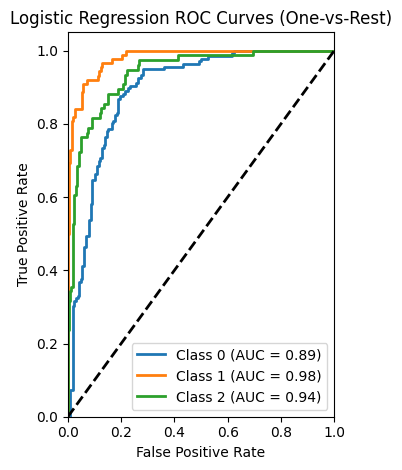

In [ ]:
#ROC FOR LOGISTIC REGRESSION
for i in range(n_classes):
    fpr_lr, tpr_lr, _ = roc_curve(y_test == i, lr_prob[:, i])
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.subplot(1, 2, 2)
    plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Class {i} (AUC = {roc_auc_lr:.2f})')

plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Logistic Regression ROC Curves (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
rf_auc_avg = 0
lr_auc_avg = 0

print("\nAUC scores for each class:")
for i in range(n_classes):
    # Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_test == i, rf_prob[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    rf_auc_avg += roc_auc_rf

    # Logistic Regression
    fpr_lr, tpr_lr, _ = roc_curve(y_test == i, lr_prob[:, i])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    lr_auc_avg += roc_auc_lr

    print(f"Class {i}: RF AUC = {roc_auc_rf:.4f}, LR AUC = {roc_auc_lr:.4f}")

rf_auc_avg /= n_classes
lr_auc_avg /= n_classes

print(f"\nAverage AUC - Random Forest: {rf_auc_avg:.4f}")
print(f"Average AUC - Logistic Regression: {lr_auc_avg:.4f}")


AUC scores for each class:
Class 0: RF AUC = 0.8606, LR AUC = 0.8941
Class 1: RF AUC = 0.9726, LR AUC = 0.9802
Class 2: RF AUC = 0.9187, LR AUC = 0.9396

Average AUC - Random Forest: 0.9173
Average AUC - Logistic Regression: 0.9379


In [ ]:

# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

# Print classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       136
           1       0.92      0.81      0.86        88
           2       0.76      0.66      0.70        76

    accuracy                           0.79       300
   macro avg       0.80      0.77      0.78       300
weighted avg       0.79      0.79      0.79       300

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       136
           1       0.91      0.84      0.88        88
           2       0.83      0.72      0.77        76

    accuracy                           0.83       300
   macro avg       0.84      0.81      0.82       300
weighted avg       0.83      0.83      0.83       300



In [ ]:

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(np.unique(y_train)), activation='softmax') # Output layer with softmax for multi-class
])

# Compile the model
model.compile(optimizer='adam', # Adjust learning rate
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])
#adm = learning rate during traning
#loss = integer value

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1) # Use validation_split for evaluation

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2880 - loss: 1.1429 - val_accuracy: 0.4857 - val_loss: 1.0225
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5754 - loss: 0.9525 - val_accuracy: 0.5571 - val_loss: 0.9157
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6385 - loss: 0.8485 - val_accuracy: 0.7000 - val_loss: 0.8192
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7193 - loss: 0.7604 - val_accuracy: 0.7571 - val_loss: 0.7170
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7773 - loss: 0.6576 - val_accuracy: 0.7714 - val_loss: 0.6546
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7574 - loss: 0.6369 - val_accuracy: 0.7571 - val_loss: 0.5961
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7574 - loss: 0.6132 - val_accuracy: 0.7857 - val_loss: 0.5640
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7811 - loss: 0.5689 - val_accuracy: 0.7571 - val_loss: 0.5439
Ep

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


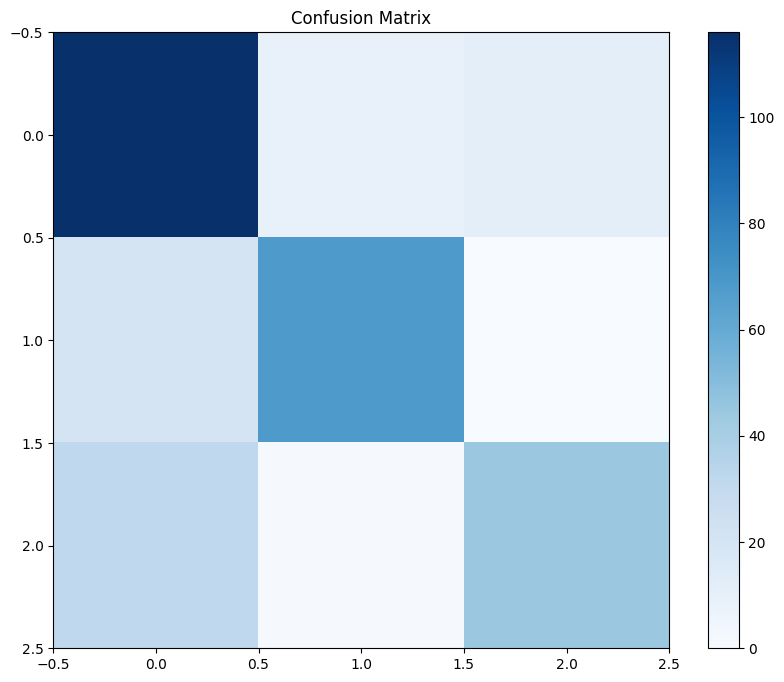

In [ ]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

## ======= Confusion Matrix ========
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

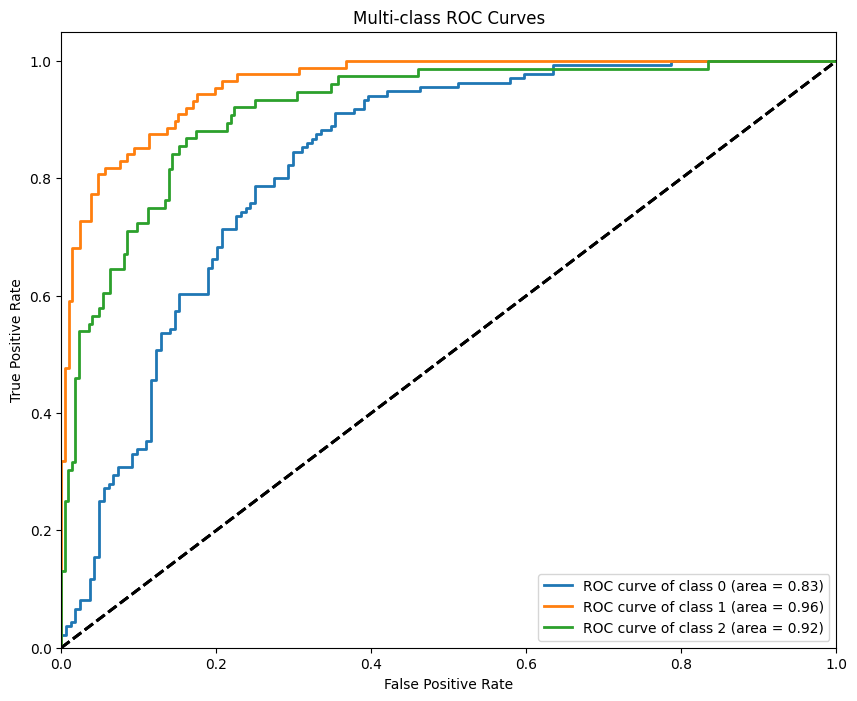


AUC scores for each class:
Class 0: 0.8275
Class 1: 0.9609
Class 2: 0.9178

Macro-average AUC: 0.9021
Micro-average AUC: 0.9108


In [ ]:
#======= ROC Curve and AUC ========
from sklearn.preprocessing import label_binarize
# For multi-class problems, we need to binarize the labels for ROC curve
n_classes = len(np.unique(y_train))

# Binarize the labels for ROC calculation
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc="lower right")
plt.savefig('roc_curves.png')
plt.show()

# Print AUC values for each class
print("\nAUC scores for each class:")
for i in range(n_classes):
    print(f"Class {i}: {roc_auc[i]:.4f}")

# Calculate macro-average AUC
macro_roc_auc = np.mean(list(roc_auc.values()))
print(f"\nMacro-average AUC: {macro_roc_auc:.4f}")

# Optionally, compute micro-average ROC curve and AUC
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(f"Micro-average AUC: {roc_auc['micro']:.4f}")


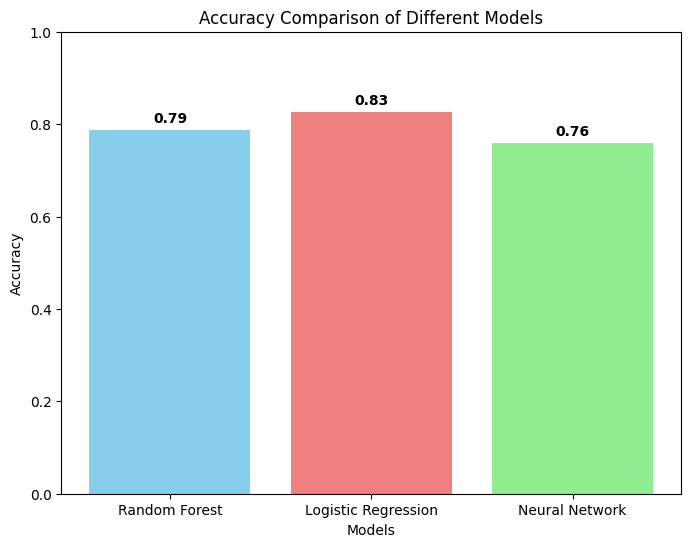

In [ ]:
models = ['Random Forest', 'Logistic Regression', 'Neural Network']
accuracies = [rf_acc, lr_acc, accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization

# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')

plt.show()

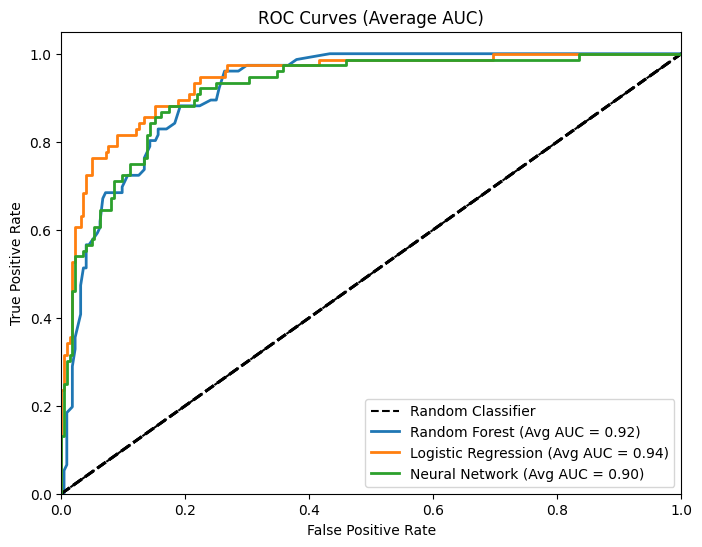

In [ ]:
rf_auc_avg = 0
lr_auc_avg = 0
nn_auc_avg = 0

n_classes = len(np.unique(y))
for i in range(n_classes):
    # Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_test == i, rf_prob[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    rf_auc_avg += roc_auc_rf

    # Logistic Regression
    fpr_lr, tpr_lr, _ = roc_curve(y_test == i, lr_prob[:, i])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    lr_auc_avg += roc_auc_lr

    # Neural Network
    fpr_nn, tpr_nn, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc_nn = auc(fpr_nn, tpr_nn)
    nn_auc_avg += roc_auc_nn


rf_auc_avg /= n_classes
lr_auc_avg /= n_classes
nn_auc_avg /= n_classes


# Plot ROC curve with average AUC

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (Avg AUC = {rf_auc_avg:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (Avg AUC = {lr_auc_avg:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot(fpr_nn, tpr_nn, lw=2, label=f'Neural Network (Avg AUC = {nn_auc_avg:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Average AUC)')
plt.legend(loc="lower right")
plt.show()
